<a href="https://colab.research.google.com/github/jonxu88/CodeFromColab/blob/main/TensorFlowClassification3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification of CIFAR100 using keras

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

cifar100 = tf.keras.datasets.cifar100

#The label_mode refers to two options, "fine" gives 100 labels, "coarse" gives 20 labels.
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

print(train_labels[0])

[11]


(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)


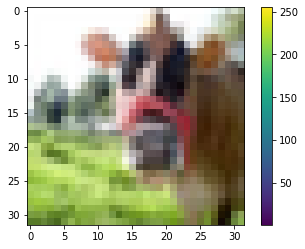

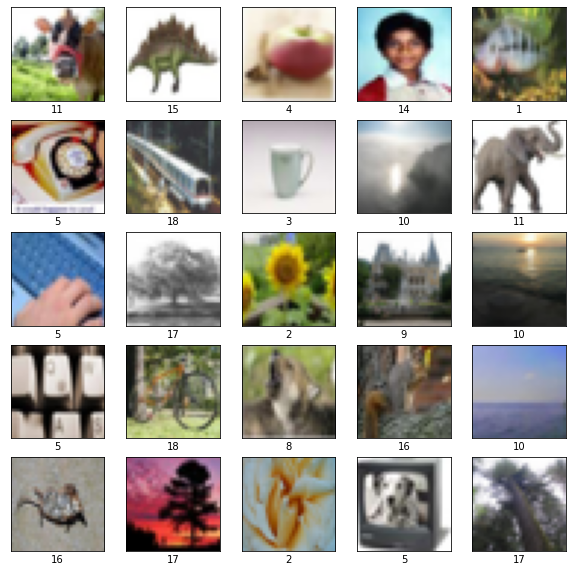

In [ ]:
#Inspect images/dimensions etc


print(train_images.shape)
print(type(train_images))
print(train_labels.shape)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(int(train_labels[i]))
plt.show()




In [ ]:
#Currently, train_images consists of 50000 different 32 by 32 by 3 matrices, with entries an integer between 0 and 255
#The type of these integers is 'numpy.uint8'. It is now converted into a float32.

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = (train_images - 127.5)/127.5
test_images = (test_images -127.5)/127.5

print(train_images[0])


[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.5294118   0.60784316  0.5137255 ]
  [ 0.6627451   0.75686276  0.6       ]
  [ 0.42745098  0.52156866  0.30980393]]

 [[ 1.          1.          1.        ]
  [ 0.99215686  0.99215686  0.99215686]
  [ 0.99215686  0.99215686  0.99215686]
  ...
  [ 0.33333334  0.38039216  0.1764706 ]
  [ 0.2627451   0.31764707  0.01960784]
  [ 0.14509805  0.20784314 -0.11372549]]

 [[ 1.          1.          1.        ]
  [ 0.99215686  0.99215686  0.99215686]
  [ 1.          1.          1.        ]
  ...
  [ 0.48235294  0.56078434  0.3254902 ]
  [ 0.3019608   0.39607844  0.01960784]
  [-0.05098039  0.04313726 -0.31764707]]

 ...

 [[ 0.16078432  0.4509804  -0.38039216]
  [ 0.11372549  0.42745098 -0.5529412 ]
  [ 0.09803922  0.40392157 -0.5294118 ]
  ...
  [-0.7647059  -0.8666667  -0.99215686]
  [-0.49019608 -0.5137255  -0.88235295]
  [-0.40392157 -0.39607844 -0.84313726]]

 [

In [ ]:
#Let's construct the convolutional neural network using Keras.

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                230432    
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
Total params: 231,988
Trainable params: 231,988
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.6556 - accuracy: 0.1857
Epoch 2/10